In [1]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.ppo.policies import MlpPolicy
from utils.adversary_env import AdversaryEnv
from utils.cartpole_wrapper import CartPoleWrapper
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Load target model
target_model = PPO.load("../ppo/models/cartpole-v1/cartpole_v1_ppo_510K")

In [2]:
# Test target model - for info on why the env is wrapped with Monitor check the evaluate_policy function
mean_reward, std_reward = evaluate_policy(target_model, Monitor(CartPoleWrapper(gym.make('CartPole-v1'))), n_eval_episodes=50)
print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 0.35 +/- 0.03


In [3]:
# Create adversary with adversary env
# adversary_env = AdversaryEnv(CartPoleWrapper(gym.make('CartPole-v1')), target_model)
# adversary = PPO(MlpPolicy, adversary_env, verbose=1)

In [4]:
# Train adversary
# log_dir = "./out/training-log/"
# log_path = log_dir + f"adversary-adversary-cartpole-v1/"
# save_dir = "./models/adversary-cartpole-v1/"

# timesteps = 50000

# adversary.learn(
#         total_timesteps=timesteps,
#         callback=None,
#         log_interval=-1,
#         eval_env=adversary_env, 
#         eval_freq=5000, 
#         n_eval_episodes=100,
#         tb_log_name='PPO',
#         eval_log_path=log_path, 
#         reset_num_timesteps=False
#         )

# # Save adversary
# adversary.save(save_dir + f"adversary_cartpole_v1_{timesteps}")

In [5]:
# Load adversary
save_dir = "./models/adversary-cartpole-v1/"

adversary = PPO.load(save_dir + f"adversary_cartpole_v1_50000")
adversary_env = AdversaryEnv(CartPoleWrapper(gym.make('CartPole-v1')), target_model)

In [13]:
import numpy as np
import pandas as pd
from strategically_timed_attack import StrategicallyTimedAttack

# Evaluate strategically timed adversarial attack over different beta
data_dict = {
    'beta': [],
    'mean_rew': [],
    'mean_perturbation': [],
    'mean_n_timesteps': [],
    'mean_n_attacks': []
}

n_episodes = 50

for j in range(20, 100):
    beta = j/1000

    all_episodes_rewards = []
    all_episodes_perturbation = []
    all_episodes_n_timesteps = []
    all_episodes_n_attacks = []

    for i in range(0, n_episodes):
        # Run attack on a2c model
        env = CartPoleWrapper(gym.make('CartPole-v1'))
        ua = StrategicallyTimedAttack(env=env, model=target_model, attack=adversary, epsilon=0.25, beta=beta)
        ua.perform_attack()

        all_episodes_rewards.append(ua.reward_total)
        all_episodes_perturbation.append(ua.perturbation_total)
        all_episodes_n_timesteps.append(ua.frames_count)
        all_episodes_n_attacks.append(ua.n_attacks)

        ua.reset_attack()

    data_dict['beta'].append(beta)
    data_dict['mean_rew'].append(np.round(np.mean(all_episodes_rewards), 2))
    data_dict['mean_perturbation'].append(np.round(np.mean(all_episodes_perturbation), 2))
    data_dict['mean_n_timesteps'].append(np.round(np.mean(all_episodes_n_timesteps), 2))
    data_dict['mean_n_attacks'].append(np.round(np.mean(all_episodes_n_attacks), 2))

    print("------------------------------------------")
    print(
        f"{data_dict['beta'][-1] = }: \n" +
        f"{data_dict['mean_rew'][-1] = } \n" +
        f"{data_dict['mean_perturbation'][-1] = } \n" +
        f"{data_dict['mean_n_timesteps'][-1] = } \n" +
        f"{data_dict['mean_n_attacks'][-1] = }"
        )
    print("------------------------------------------")

------------------------------------------
data_dict['beta'][-1] = 0.001: 
data_dict['mean_rew'][-1] = -2.09, 
data_dict['mean_perturbation'][-1] = 6.87 
data_dict['mean_n_timesteps'][-1] = 12.42 
data_dict['mean_n_attacks'][-1] = 6.1
------------------------------------------
------------------------------------------
data_dict['beta'][-1] = 0.002: 
data_dict['mean_rew'][-1] = -2.04, 
data_dict['mean_perturbation'][-1] = 6.84 
data_dict['mean_n_timesteps'][-1] = 13.6 
data_dict['mean_n_attacks'][-1] = 6.28
------------------------------------------
------------------------------------------
data_dict['beta'][-1] = 0.003: 
data_dict['mean_rew'][-1] = -2.06, 
data_dict['mean_perturbation'][-1] = 6.68 
data_dict['mean_n_timesteps'][-1] = 12.46 
data_dict['mean_n_attacks'][-1] = 6.12
------------------------------------------
------------------------------------------
data_dict['beta'][-1] = 0.004: 
data_dict['mean_rew'][-1] = -2.06, 
data_dict['mean_perturbation'][-1] = 6.66 
data_dict['

In [14]:
print(data_dict)

{'beta': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099], 'mean_rew': [-2.09, -2.04, -2.06, -2.06, -2.05, -2.09, -2.03, -2.02, -2.0, -2.0, -2.06, -2.03, -2.08, -2.05, -2.04, -2.04, -2.08, -2.04, -2.04, -2.03, -2.05, -2.01, -2.04, -2.06, -2.04, -2.04, -2.03, -2.01, -1.99, -2.0, -2.04, -2.04, -2.04, -2.01, -1.92, -2.02, -1.86, -1.91, -1.87, -1.89, -1.87, -1.85, -

In [15]:
# Create DataFrame
labels = ['beta', 'mean_rew', 'mean_perturbation', 'mean_n_timsteps', 'mean_n_attacks']

data_df = pd.DataFrame(
        data_dict, 
        columns=labels,
        )
data_df.set_index('beta', inplace=True)

# Save data as .csv file
with open("./out/data/" + "strategically_timed_attack_beta", 'w') as f:
    data_df.to_csv(f)

data_df

,mean_rew,mean_perturbation,mean_n_timsteps,mean_n_attacks
beta,,,,
0.001,-2.09,6.87,NaN,6.10
0.002,-2.04,6.84,NaN,6.28
0.003,-2.06,6.68,NaN,6.12
0.004,-2.06,6.66,NaN,6.10
0.005,-2.05,6.89,NaN,6.22
...,...,...,...,...
0.095,0.52,0.00,NaN,0.00
0.096,0.48,0.04,NaN,0.06
0.097,0.51,0.00,NaN,0.00


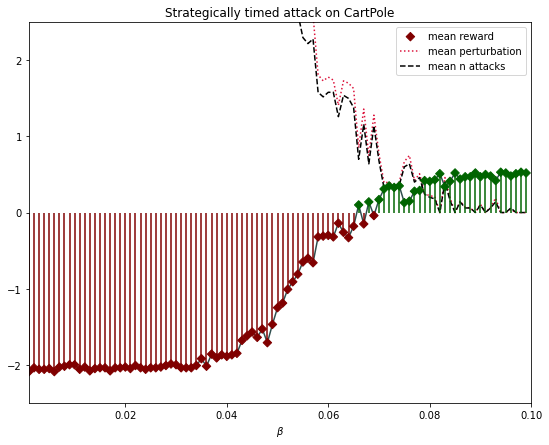

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load data
with open("./out/data/" + "strategically_timed_attack_beta", 'r') as f:
    data_df = pd.read_csv(f, index_col=0)

# Plot data_df
plt.figure(figsize=(9,7))
plt.plot(data_df.index, data_df['mean_rew'], color='darkslategray', alpha=1, zorder=0)
plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dotted', alpha=1, zorder=0)

plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dashed', alpha=1, zorder=0)

plt.title("Strategically timed attack on CartPole")
plt.legend()
plt.xlabel('$\\beta$')
# plt.ylabel()
plt.axis([0.001, 0.1, -2.5, 2.5]) # plt.axis([xmin, xmax, ymin, ymax])
plt.show()